# UE02 - RDF and RDF Schema

Before you start with this notebook, complete the eight tasks in the `1. RDF` sheet of `SemAI.jar`. You will then make use of your solutions in this notebook. 

## Task 0: Preparation

Preparation (Installs and Imports). 




In [ ]:

# Install required packages in the current Jupyter kernel
!pip install -q rdflib 
!pip install -q pydot
!pip install -q owlrl

!pip install networkx pyvis

import rdflib
from rdflib import Graph, Literal, RDF, URIRef, BNode, Namespace, Dataset
import networkx as nx
from pyvis.network import Network
import requests
from IPython.display import display, HTML, Image
import os
import pydot
import owlrl
from rdflib.namespace import FOAF , XSD , RDFS 

from IPython.display import display, Markdown  # used for creating the HTML table output --> display(Markdown(rdf2htmltable(gr)))  # function for creating markdown output: https://jupyterbook.org/en/stable/content/code-outputs.html



## Task 1:  Improve interactive RDF graph visualization (1 pt)

Improve function `visualize_graph_pyvis` (from `V01_rdf.ipynb`) as follows:
- an optional `base` parameter
- abbreviate the labels of nodes and edges in the same way as in `visualize_graph`. 
- make sure that blank node IDs are not shown in the visualization. 

Optional features: 
- use different graphical forms for literals and URIs
- (add further improvements as you like)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [ ]:
rdf_str = """BASE   <http://example.org/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX wd: <http://www.wikidata.org/entity/>
 
<bob#me>
   a foaf:Person ;
   foaf:knows <alice#me> ;
   schema:birthDate "1990-07-04"^^xsd:date ;
   foaf:topic_interest wd:Q12418 .
   
wd:Q12418
  dcterms:title "Mona Lisa" ;
  dcterms:creator <http://dbpedia.org/resource/Leonardo_da_Vinci> .

<http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619>
  dcterms:subject wd:Q12418 .
"""

## Task 2:  Print RDF graph as HTML table (1 pt)

Implement a function `rdf2htmltable(g)` that 
- takes as parameter an rdflib.Graph 
- generates and displays an HTML table representing that graph with
  - one line per RDF statement 
  - three columns (subject, predicate, object) 
  - URIs should be shown in abbreviated form and be represented as links (`href=<full URI>`)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [ ]:
def rdf2htmltable(g): #g is a rdflib Graph object
  # get the namespace manager for the graph --> needed to get the abbreviated resource namespaces later on
  nm = g.namespace_manager

  # Extract all unique subjects, predicates, and objects from the graph
  subjects_links = list(g.subjects())
  predicates_links = list(g.predicates())
  objects_links = list(g.objects())

  # Create HTML table
  table = "<table>\n"
  # Add table headers 
  table += "<tr>"
  table += f"\n\t<th>Subjects</th>"
  table += f"\n\t<th>Predicates</th>"
  table += f"\n\t<th>Objects</th>"
  table += "\n</tr>\n"

  # Add table rows for each statement
  for idx, s in enumerate(subjects_links):
    # print(idx, s)
    table += "<tr>"
    # Add a column for subjects, predicates, and objects
    table += "\n\t<td><a href='{}'>{}</td>".format(s, nm.qname(s) if isinstance(s, URIRef) else str(s)) # s == subject_links[idx]  ## nm.qname(xy) is the abbreviated resource namespace 
    table += "\n\t<td><a href='{}'>{}</td>".format(predicates_links[idx],nm.qname(predicates_links[idx]) if isinstance(predicates_links[idx], URIRef) else str(predicates_links[idx]))
    table += "\n\t<td><a href='{}'>{}</td>".format(objects_links[idx],nm.qname(objects_links[idx])  if isinstance(objects_links[idx], URIRef) else str(objects_links[idx]))
    table += "\n</tr>\n"
    ## explanation: if isinstance(link, URIRef) else str(link)   this is used  if there is an URI that cannot be split into prefix and localname by the nm.qname function --> it uses the String instead
  # Close the HTML table
  table += "</table>"


  return table

## Test with rdf_str

In [ ]:
gr = Graph()
gr.parse(data=rdf_str, format='turtle')
# print(rdf2htmltable(gr))
display(Markdown(rdf2htmltable(gr)))  # found function for creating markdown output here: https://jupyterbook.org/en/stable/content/code-outputs.html


## Test with 0. Intro from SemAI.jar

In [ ]:

test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John a foaf:Person.
ex:John foaf:knows ex:Mary.
'''
gr = Graph()
gr.parse(data=test_str, format='turtle')
# print(rdf2htmltable(gr))
display(Markdown(rdf2htmltable(gr)))  # found function for creating markdown output here: https://jupyterbook.org/en/stable/content/code-outputs.html


## Task 3: A function for parsing and displaying an RDF graph (1 pt)

A function `parse_display_rdf(str)` that takes as parameter a string which represents an RDF graph in Turtle notation and 
- produces an rdflib.Graph from that string
- prints the graph in Turte notation
- prints the graph in RDF/XML
- visualizes it using `visualize_graph` (to be taken from `V01_rdf.ipynb`)
- visualizes it using (your improved version of) `visualize_graph_pyvis`
- outputs it using `rdf2htmltable` (only if you have implemented this function)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [ ]:
from rdflib import Graph

def parse_display_rdf(s):
  g = Graph()
  g.parse(data=s, format='turtle')
  # Visualize in turtle
  print('\n\n-----------------\nTURTLE NOTATION\n-----------------\n',g.serialize(format="turtle",base="http://example.org/"))
  # Visualize in RDF/XML
  print('\n\n-----------------\nRDF/XML NOTATION\n-----------------\n',g.serialize(format="xml",base="http://example.org/"))
  # Visualize as graph
  print('\n\n-----------------\nGRAPH\n-----------------\n')
  visualize_graph(g,base=None)
  # Visualize as HTML table
  print('\n\n-----------------\nHTML TABLE\n-----------------\n')
  display(Markdown(rdf2htmltable(g)))

  return g


In [ ]:
# code taken from V01!

# A function to produce a graphical visualization of an RDF graph
def visualize_graph(g,base=None):

  def node_id(graph,term):
    if isinstance(term,Literal): return term.n3(graph.namespace_manager)
    else: return f"\"{term.n3(graph.namespace_manager)}\""

  def add_node(dg,g,t,base):
    if isinstance(t,URIRef):
      lbl = f"\"{t.n3(g.namespace_manager)}\""
      if(base): lbl = lbl.replace(base,"")
      if(len(lbl)>25): lbl = lbl[:12] + "..." +  lbl[-12:] 
      dg.add_node(pydot.Node( node_id(g,t), label=lbl ))
    if isinstance(t,Literal):
      dg.add_node(pydot.Node( node_id(g,t), label=t.n3(g.namespace_manager), shape="box"))
    if isinstance(t,BNode):
      dg.add_node(pydot.Node( node_id(g,t), label=""))    

  def add_edge(dg,g,s,p,o):
    dg.add_edge(pydot.Edge(node_id(g,s), node_id(g,o), label=f"\"{p.n3(g.namespace_manager)}\""))

  dg = pydot.Dot('my_graph', graph_type='digraph',layout='sfdp', splines='curved' )

  for subj in g.subjects(None,None): add_node(dg,g,subj,base)
  for obj in g.objects(None,None): add_node(dg,g,obj,base)
  for (s,p,o) in g: add_edge(dg,g,s,p,o)   

  display(Image(dg.create_png()))


## Test with rdf_str

In [ ]:
print(parse_display_rdf(rdf_str))

## Test with example from Intro (John Mary)

In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John a foaf:Person.
ex:John foaf:knows ex:Mary.
'''


print(parse_display_rdf(test_str))

# Tasks 4-10 (1 point each)

For each of the remaining 7 tasks in the "1. RDF" sheet in `SemAI.jar` do the following: 
- add a text cell in this notebook 
  - with the description of the task from `SemAI.jar` 
  - with number and title (e.g., **1. Simple Data Graph**)  from `SemAI.jar` as header 
- add a code cell where you apply `parse_display_rdf(str)` on your solution

## Task 4 (1. Simple Data Graph)

Create an RDF graph in Turtle notation. Use the FOAF vocabulary to state the following.

- Mary and Jim are persons.
- Mary knows Jim.
- Mary is 27 years old.
- The URIs for the two persons should be http://www.ex.org/person#Mary and http://www.ex.org/person#Jim. The age of Mary should be represented as an integer.

Your Solution:


```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix :     <http://www.ex.org/person#> .

:Mary a foaf:Person. 
:Jim a foaf:Person.    #hätte gedacht die obigen sind useless weil ':' P. impliziert
:Mary foaf:knows :Jim.
:Mary foaf:age 27 .    # kam in den folien vor, aber nicht im vocab zu finden...?
```


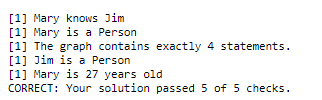



In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix :     <http://www.ex.org/person#> .

:Mary a foaf:Person. 
:Jim a foaf:Person.    
:Mary foaf:knows :Jim.
:Mary foaf:age 27 .    
'''

print(parse_display_rdf(test_str))

## Task 5 (2. Simple Schema)
Create a vocabulary using RDFS in Turtle. Specify

- Classes Company, Employee, and Person
- Property worksFor between Employee and Company
- Property salary of Employee with Integer as data type
- Class Employee is a subclass of Person

Use XSD for data types. The URIs of classes and properties are in namespace <http://www.ex.org/vocabulary#>, for example, <http://www.ex.org/vocabulary#Company>

Your Solution:


```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#>
@prefix :     <http://www.ex.org/vocabulary#> .

:Company a rdfs:Class .
:Employee a rdfs:Class . #wieso brauche ich das wenn Employee eh subClassOf Person ist?
:Person a rdfs:Class .

:worksFor a rdf:Property ; # hier ';' und nächste Zeile ohne subject weil es wieder vom selben subjekt ausgeht (sub-präd-obj)
  rdfs:domain :Employee ;
  rdfs:range :Company .

:salary a rdf:Property ;
  rdfs:domain :Employee ;
  rdfs:range xsd:integer .

:Employee rdfs:subClassOf :Person .

```
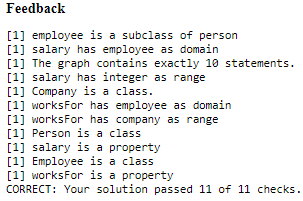

In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix :     <http://www.ex.org/vocabulary#> .

:Company a rdfs:Class .
:Employee a rdfs:Class . 
:Person a rdfs:Class .

:worksFor a rdf:Property ;
  rdfs:domain :Employee ;
  rdfs:range :Company .

:salary a rdf:Property ;
  rdfs:domain :Employee ;
  rdfs:range xsd:integer .

:Employee rdfs:subClassOf :Person .
'''

print(parse_display_rdf(test_str))

## Task 6 (3. Reification)

Create an RDF graph in Turtle notation. Use the RDF vocabulary where applicable and the example namesspace (ex:) for all other resources (ex:Mary, ex:John, ex:says, ex:loves). Hint: the lecture slides contain a similar reification example.

- Mary says that John loves her.

Your Solution:



```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

#slide 48

ex:Stmt rdf:object ex:Mary ;
  rdf:subject ex:John ;
  rdf:predicate ex:loves ;
  rdf:type rdf:Statement .

ex:Mary ex:says ex:Stmt .
```
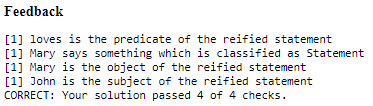

In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:Stmt rdf:object ex:Mary ;
  rdf:subject ex:John ;
  rdf:predicate ex:loves ;
  rdf:type rdf:Statement .

ex:Mary ex:says ex:Stmt .
'''

print(parse_display_rdf(test_str))

## Task 7 (4. Blank Node)

Create an RDF graph in Turtle notation. Use the RDF and FOAF vocabularies where applicable and the example namesspace (ex:) for the other resources.

- John knows a person, who knows Mary.
- Use a blank node to represent that anonymous person.


Your Solution:

```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John foaf:knows _:1 .

_:1 rdf:type foaf:Person ;
  foaf:knows ex:Mary .

###geht auch###
# ex:John foaf:knows [
# rdf:type foaf:Person;
# foaf:knows ex:Mary
# ] .
```
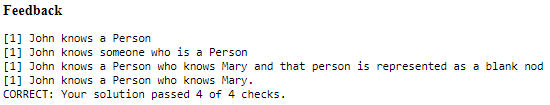

In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John foaf:knows _:1 .

_:1 rdf:type foaf:Person ;
  foaf:knows ex:Mary .
'''
try:
  print(parse_display_rdf(test_str))
except ValueError as e:
  print('very complicated example that yielded ValueError.') 

## Task 8 (5. Multiple Classification)

Create an RDF graph in Turtle notation. Use the RDF vocabulary where applicable and the example namesspace (ex:) for the other resources.

- John is an instance of SoccerPlayer and of Student.

Your Solution:

```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:John rdf:type ex:SoccerPlayer ; rdf:type ex:Student .
```
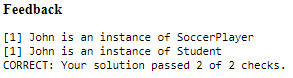



In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:John rdf:type ex:SoccerPlayer ; rdf:type ex:Student .
'''

print(parse_display_rdf(test_str))

## Task 9 (6. Metamodeling)
Create an RDF graph in Turtle notation. Use the RDF and RDF Schema vocabularies where applicable and the example namesspace (ex:) for the other resources.

- Dog and Cat are instances of Species and subclasses of Animal.
- Lassie is an instance of Dog.

Your Solution:


```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:Dog rdf:type ex:Species ; rdfs:subClassOf ex:Animal .
ex:Cat rdf:type ex:Species ; rdfs:subClassOf ex:Animal .
ex:Lassie rdf:type ex:Dog .
```

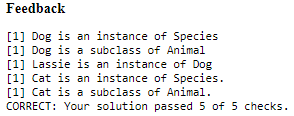



In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:Dog rdf:type ex:Species ; rdfs:subClassOf ex:Animal .
ex:Cat rdf:type ex:Species ; rdfs:subClassOf ex:Animal .
ex:Lassie rdf:type ex:Dog .
'''

print(parse_display_rdf(test_str))

## Task 10 (7. Properties)

Create an RDF graph in Turtle notation. Use the RDF and RDF Schema vocabularies where applicable and the example namesspace (ex:) for the other resources, e.g., ex:childOf, ex:descendantOf.

- Everyone who is a child of someone, is also a descendant of that someone.

Your Solution:

```
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

# hilfreich slide 135

ex:childOf rdfs:subPropertyOf ex:descendantOf .
```
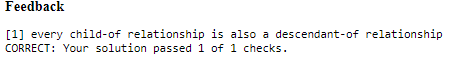


In [ ]:
test_str = '''
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:childOf rdfs:subPropertyOf ex:descendantOf .
'''

print(parse_display_rdf(test_str))